## <u>Initially we are importing all the libraries that we use</u>

In [44]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('tableau-colorblind10')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix,auc

from sklearn.utils import resample

from sklearn.pipeline import make_pipeline

import time
import os

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

### <u>Reading the data</u>

In [2]:
#dataset loading
house_data= pd.read_csv(r'F:\Data Science and machine learning\Kaggle_compititions\House Prices Advanced Regression Techniques\train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#checking the shape of the data
house_data.shape

(1460, 81)

There are 81 columns which will take a huge part of data analysis

In [4]:
#Checking the information of the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

we can see a lot of nullvalues present in the data set. We can handle them in Data analysis part

In [5]:
# Now lets check the target variable which is 'SalePrice'

In [6]:
house_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

By this we infer that there are no negative values

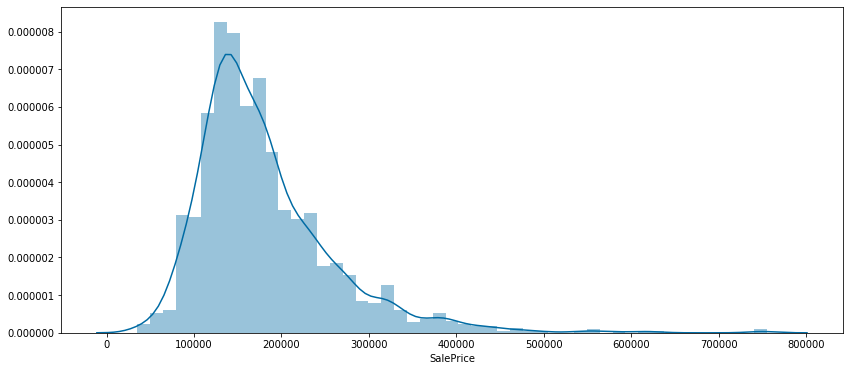

In [7]:
plt.figure(figsize=(14,6))
sns.distplot(house_data.SalePrice);

By this distribution plot Salesprice is skewed to right so we need to handle otherwise this will impact our model

### There is no use of ID column which is unique. So drop the column ID

In [8]:
house_data.drop(columns=['Id'],inplace=True)

### Now lets check the columns which are having the null values and their count

In [9]:
null_columns=[]
for column in house_data.columns:
    if(house_data[column].isnull().sum()>0):
        print('Column ',column,' has ',house_data[column].isnull().sum(),' Null-values')
        null_columns.append(column)
null_columns


Column  LotFrontage  has  259  Null-values
Column  Alley  has  1369  Null-values
Column  MasVnrType  has  8  Null-values
Column  MasVnrArea  has  8  Null-values
Column  BsmtQual  has  37  Null-values
Column  BsmtCond  has  37  Null-values
Column  BsmtExposure  has  38  Null-values
Column  BsmtFinType1  has  37  Null-values
Column  BsmtFinType2  has  38  Null-values
Column  Electrical  has  1  Null-values
Column  FireplaceQu  has  690  Null-values
Column  GarageType  has  81  Null-values
Column  GarageYrBlt  has  81  Null-values
Column  GarageFinish  has  81  Null-values
Column  GarageQual  has  81  Null-values
Column  GarageCond  has  81  Null-values
Column  PoolQC  has  1453  Null-values
Column  Fence  has  1179  Null-values
Column  MiscFeature  has  1406  Null-values


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

There are so many null values.

Lets handle these null values first

### Let us now analyse whether these null values having any relationship with the target variable salesprice or not

In [10]:
# Lets take a copy of the data
house_eda= house_data.copy()
house_eda.shape

(1460, 80)

In [11]:
len(null_columns)

19

Totally there are 19 columns which are having null values. Lets check if there is any relation between thes columns with target variables by ploting them

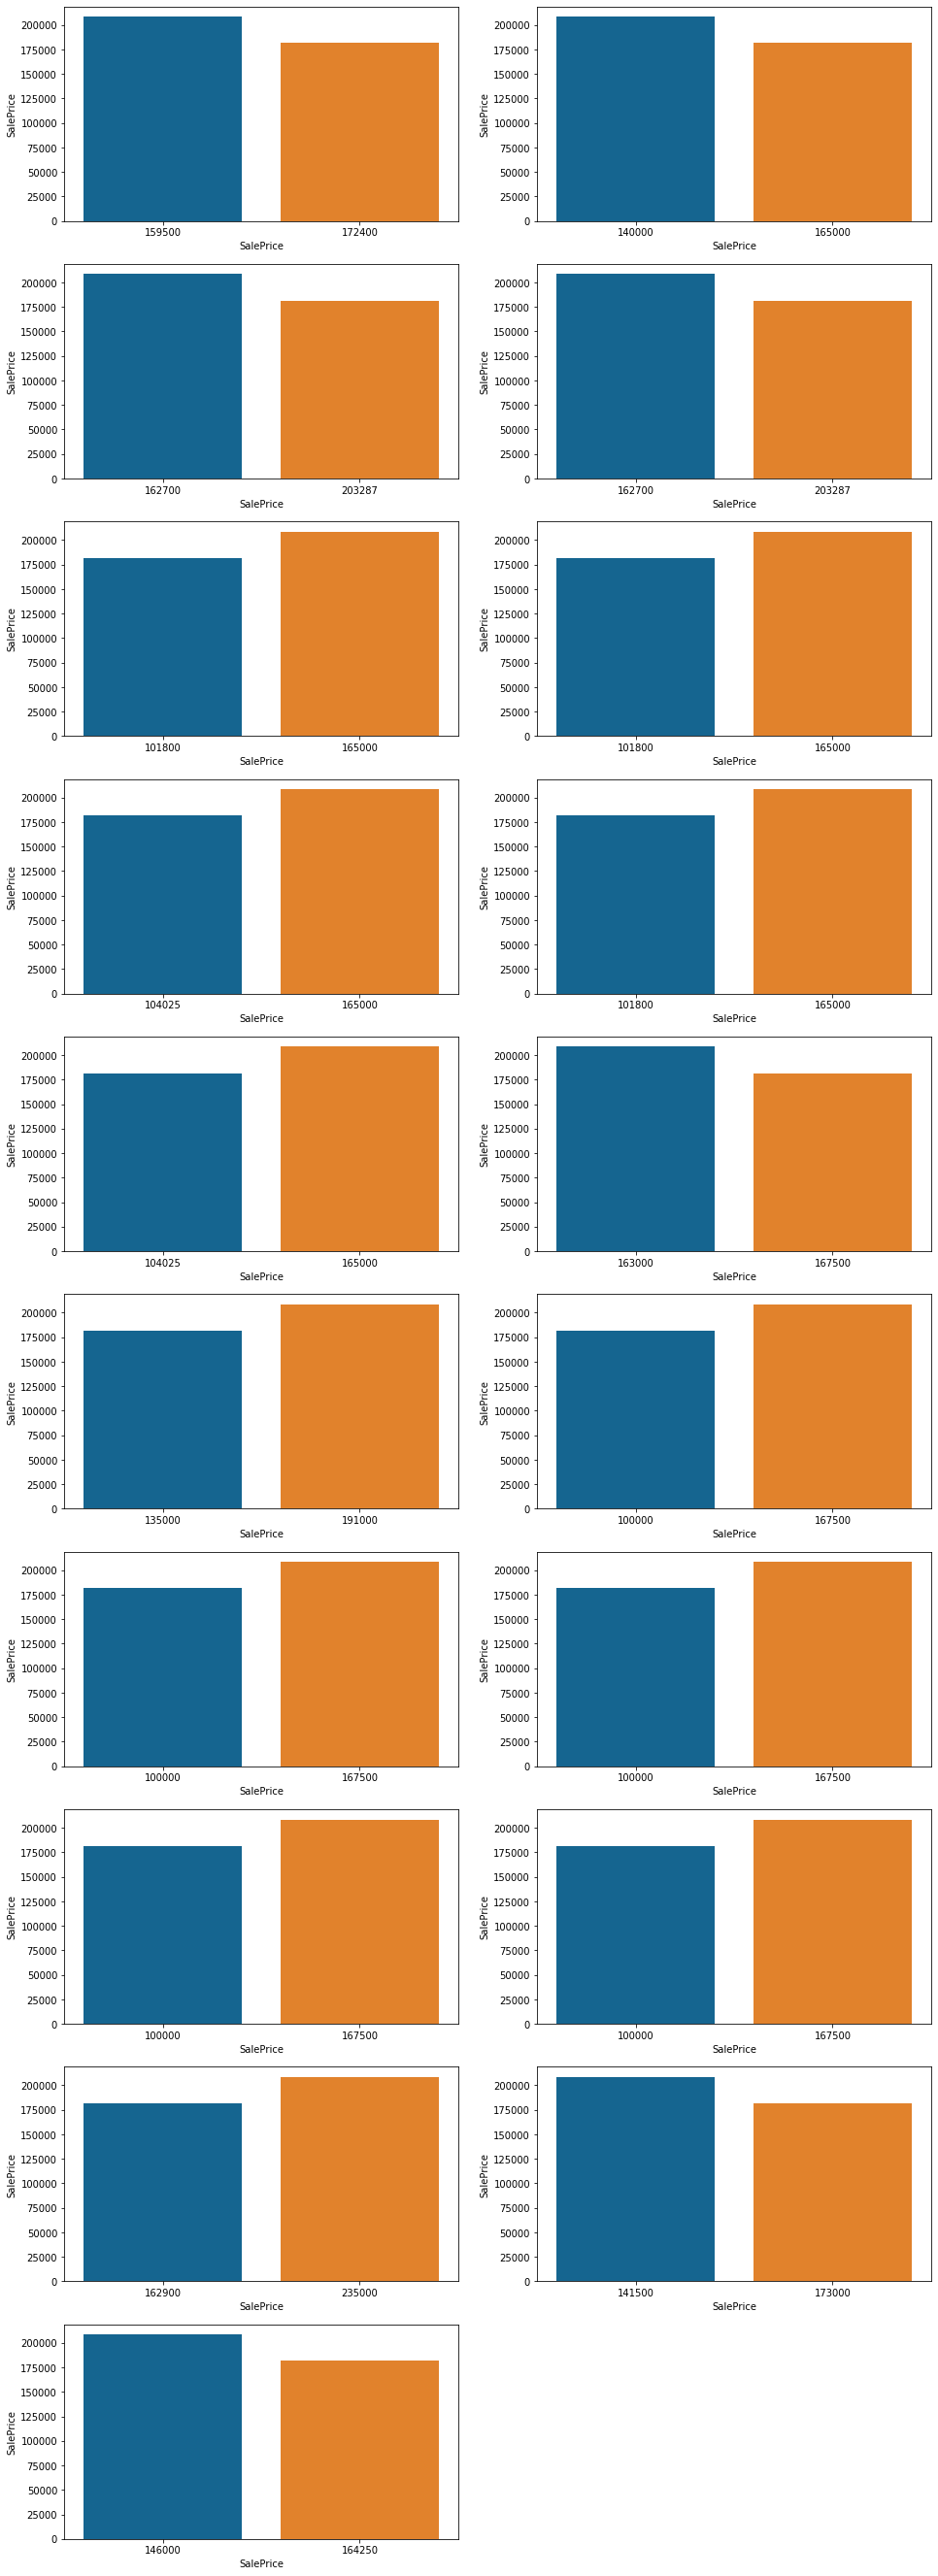

In [12]:
for i in null_columns:
    house_eda[i]=np.where(house_eda[i].isnull(),1,0)
    
#Plotting

plt.figure(figsize=(16,48))
for index,col in enumerate(null_columns):
    plt.subplot(10,2,index+1)
    sns.barplot(x=house_eda.groupby(col)['SalePrice'].median(),y=house_eda['SalePrice'])
plt.show();

From this we can see that there variable have a strong relationship with the target variable , hence we can neither drop the columns with null values, nor we can drop the rows with null values. 

### There are some year variables in the dataset lets check those variables

In [13]:
year_variables=[]
for col in house_data.columns:
    if 'Yr' in col or 'Year' in col:
        year_variables.append(col)
        
year_variables = set(year_variables)
year_variables

{'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'}

In [14]:
year_variables

{'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'}

### Lets check the relation of year_variables with the target variable

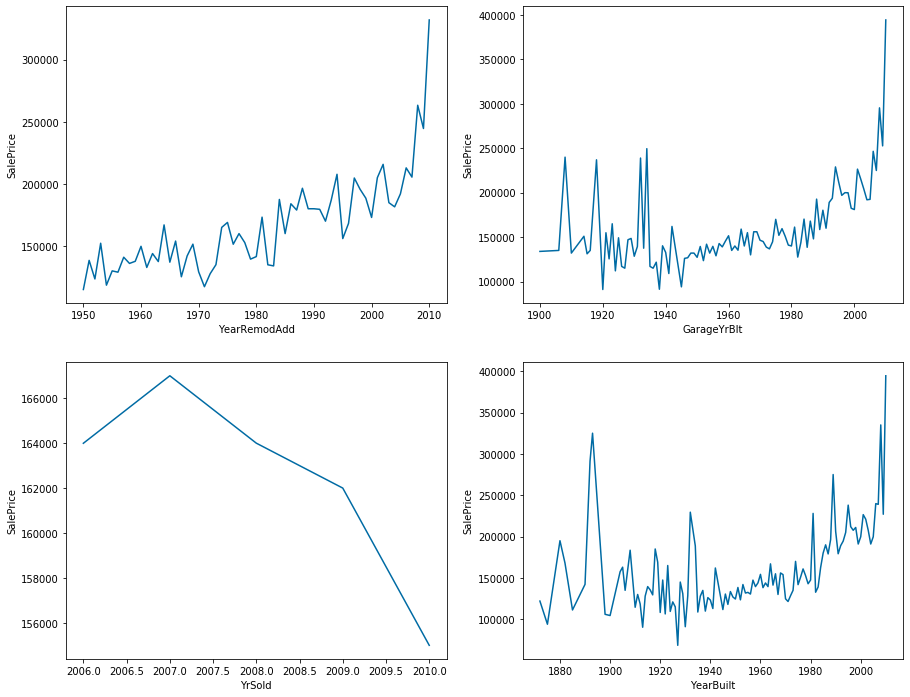

In [15]:
plt.figure(figsize=(15,12))
for index,col in enumerate(year_variables):
    plt.subplot(2,2,index+1)
    plt.plot(house_data.groupby(col)['SalePrice'].median())
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.show();

By checking the trend of 'YrSold' it shows a decreasing trend which seems to be unreal in real world scenario,price is expected to increase as the time passes.

Therfore we can create 'Age' variables out of these 'Year' variables

In [16]:
# Now lets separate the categorical and numerical columns
cat_vars = []
num_vars = []

for col in house_data.columns.drop('SalePrice'):
    if(house_data[col].dtypes =='O'):
        cat_vars.append(col)
    else:
        num_vars.append(col)
print('List of numerical columns ',num_vars)
print('-'*60)
print('List of categorical columns',cat_vars)

List of numerical columns  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
------------------------------------------------------------
List of categorical columns ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAi

### Lets separate the numeric features againg into continuous and discrete numeric features

In [17]:
num_cont = []
num_dis =[]

for col in num_vars:
    if(house_data[col].nunique()>25): # if variable has more than 25 different values, we consider it as continous variable
        num_cont.append(col)
    else:
        num_dis.append(col)

In [18]:
num_cont
print('-'*50)
num_dis

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

--------------------------------------------------


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Now lets check for the variance in the diferent continuous numeric columns present in the dataset

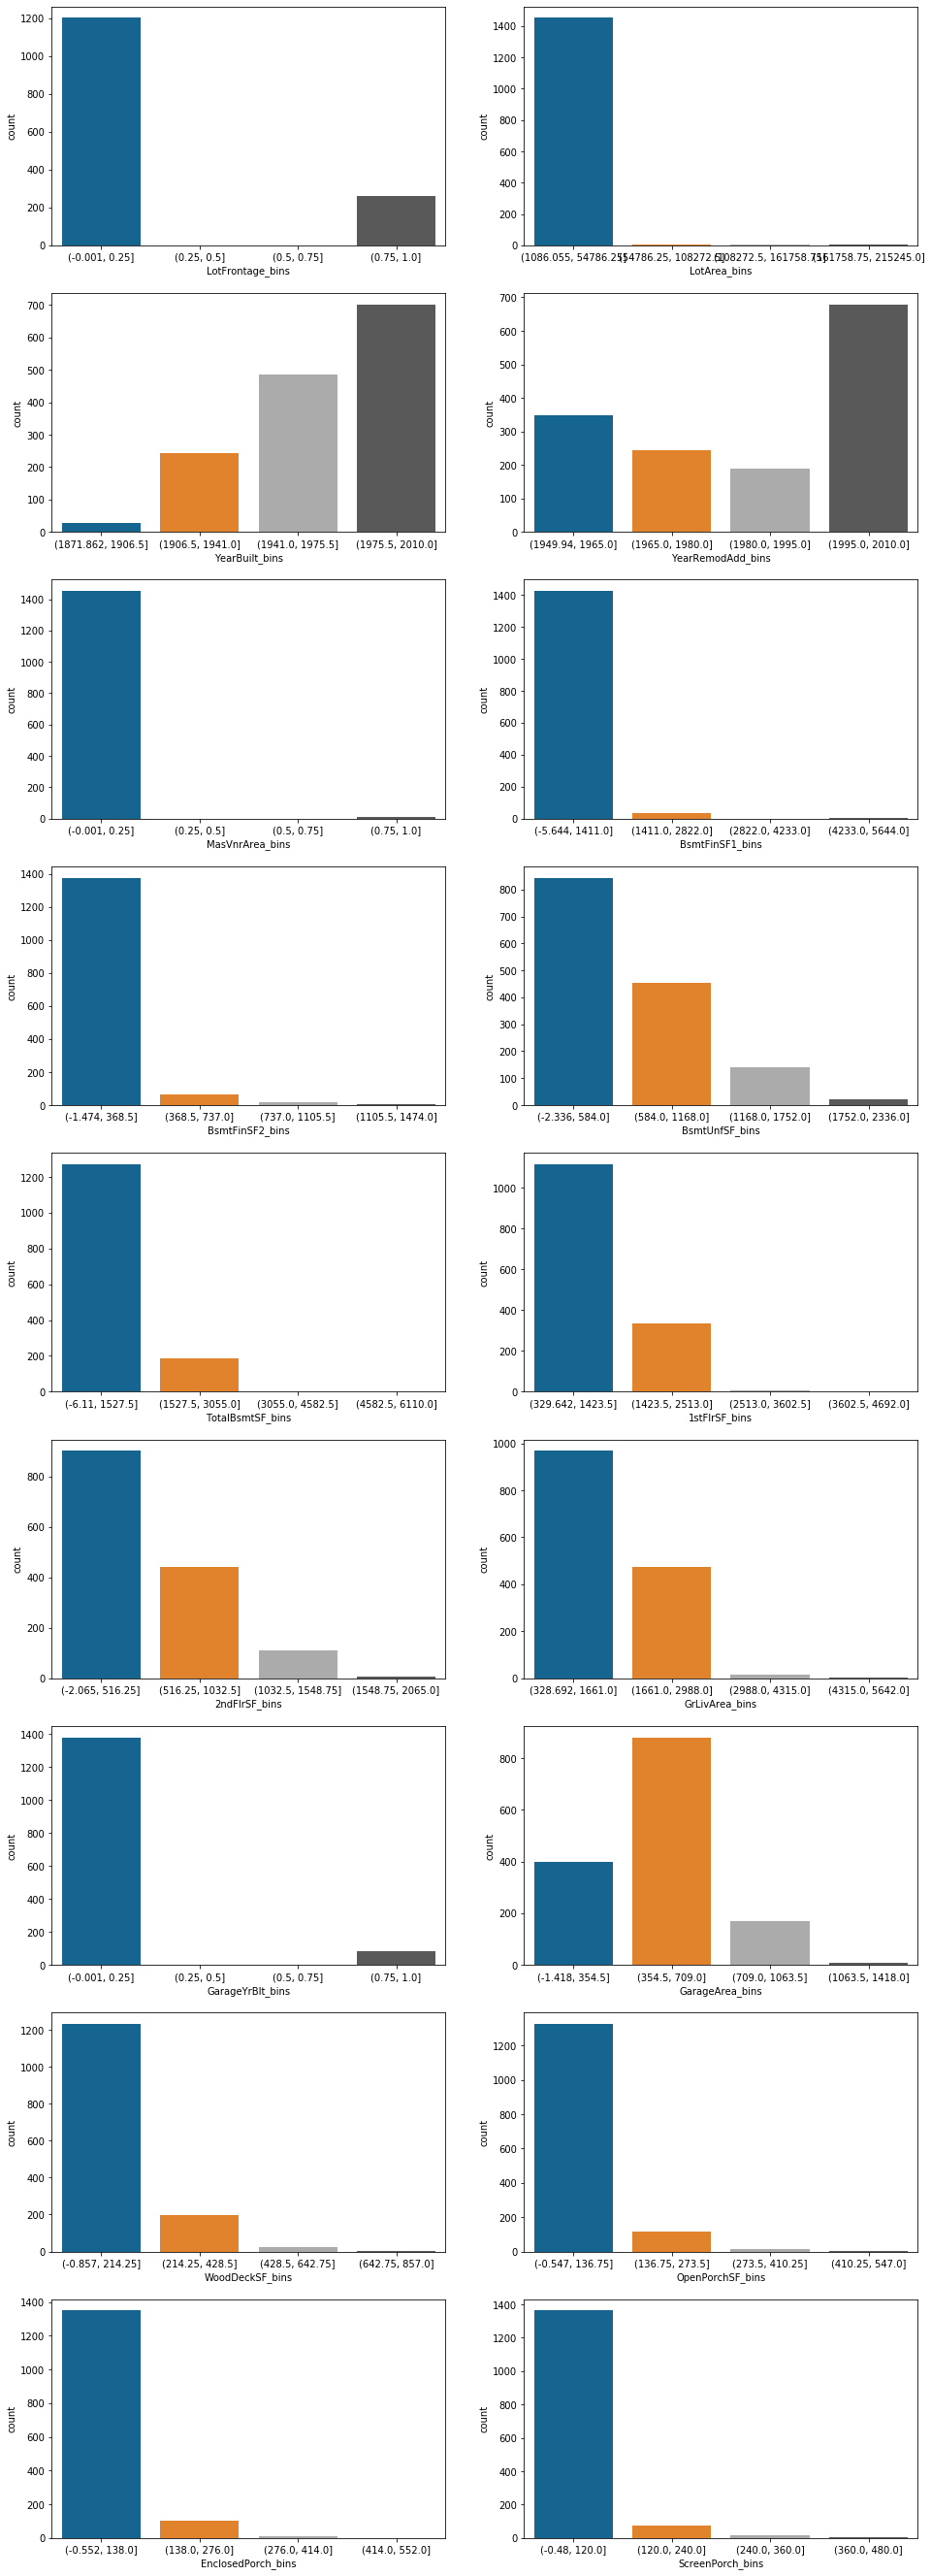

In [19]:
plt.figure(figsize=(16,48))
for index,col in enumerate(num_cont):
    col_bins = col+'_bins'
    house_eda[col_bins]=pd.cut(house_eda[col],4,duplicates='drop') # creating bins
    plt.subplot(9,2,index+1)
    sns.countplot(house_eda[col_bins])
plt.show();

MasVnArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PooArea,MiscVal.

These variables seems to have a low variance

We will see if these variables can be dropped in the feature engineering section

### Now lets check for the variance in the diferent discrete numeric columns present in the dataset

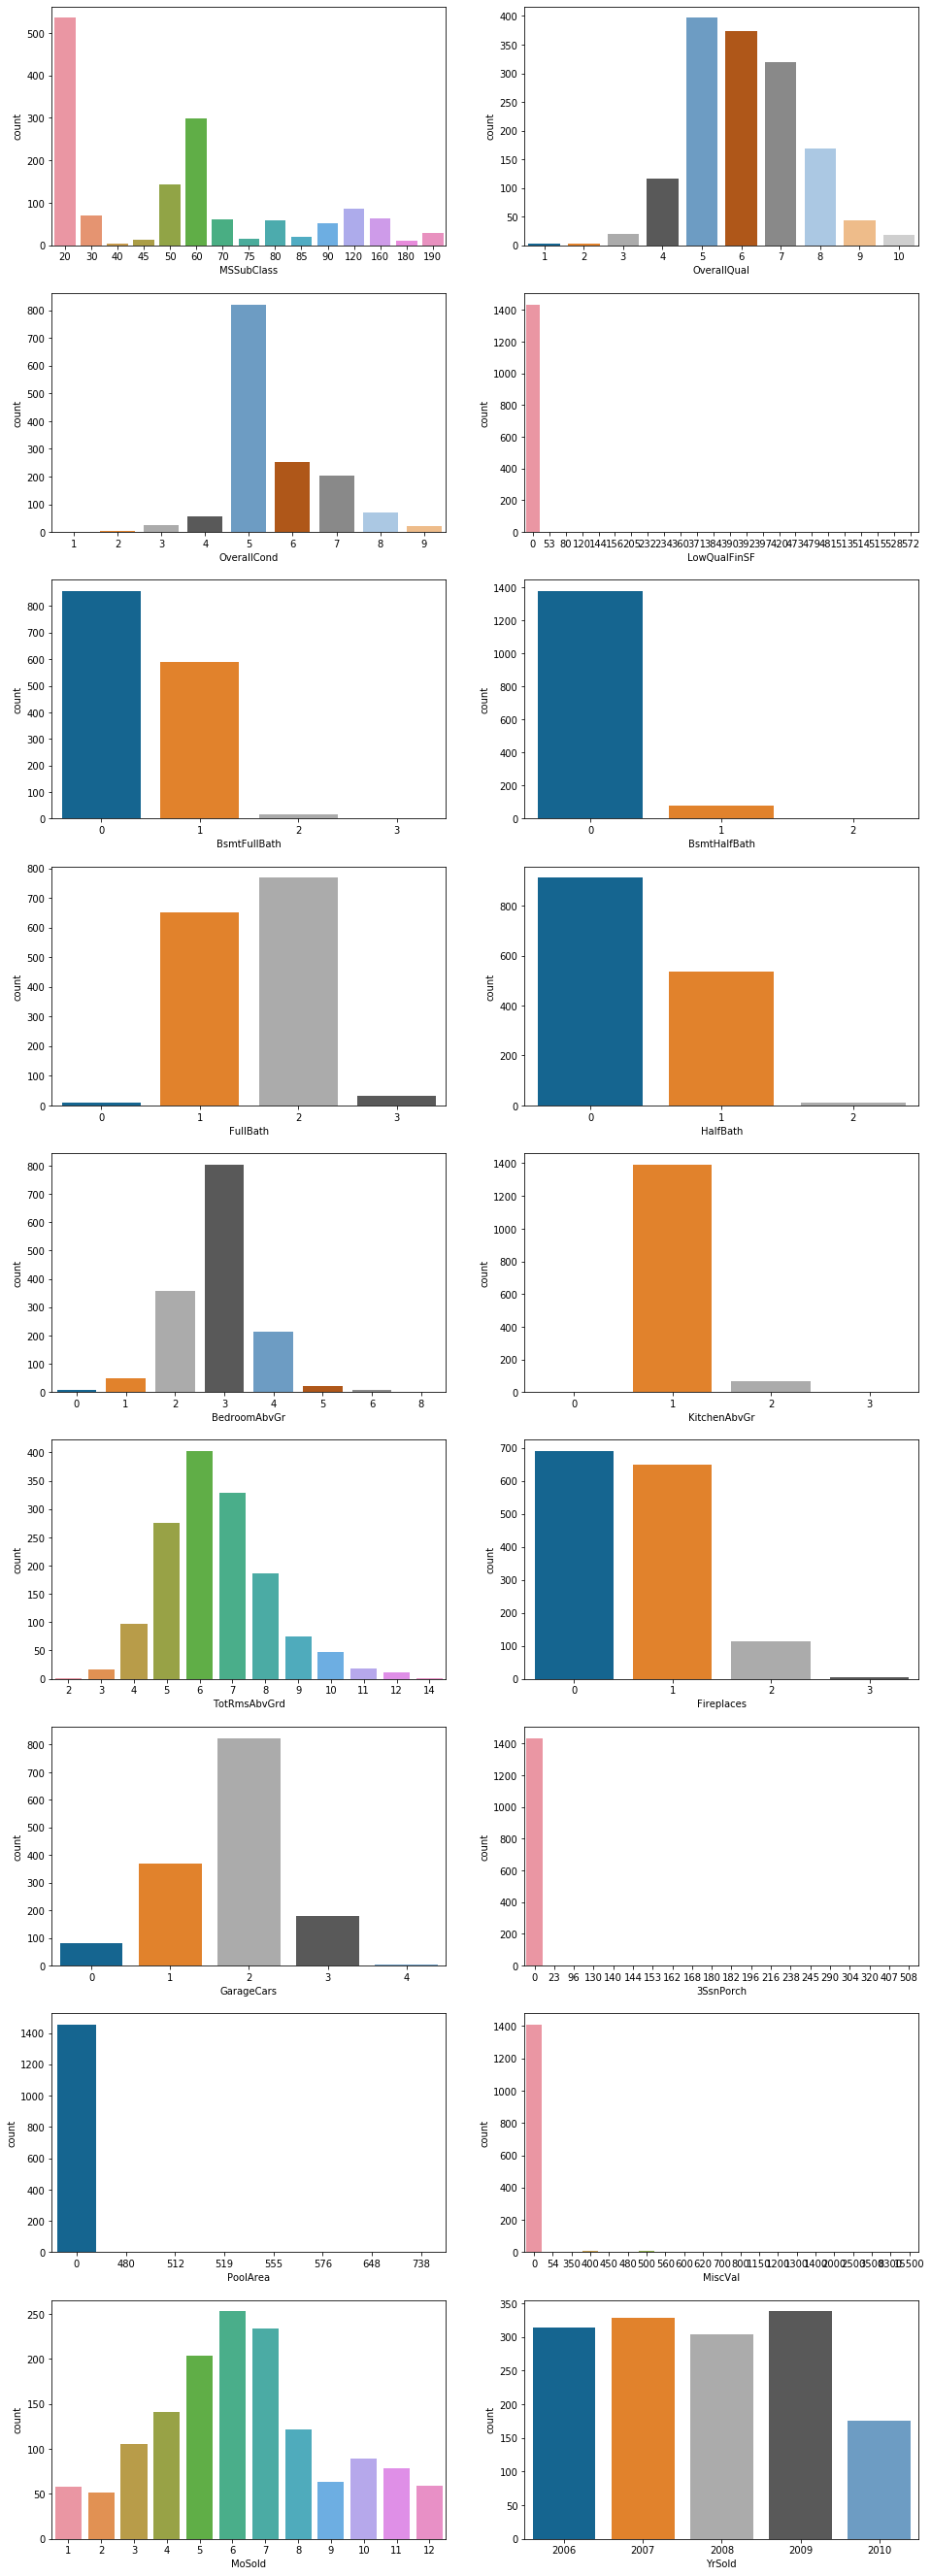

In [20]:
plt.figure(figsize=(16,48))
for index,col in enumerate(num_dis):
    plt.subplot(9,2,index+1)
    sns.countplot(house_eda[col])
plt.show();

### Now lets check for the variance in the categorical columns present in the dataset

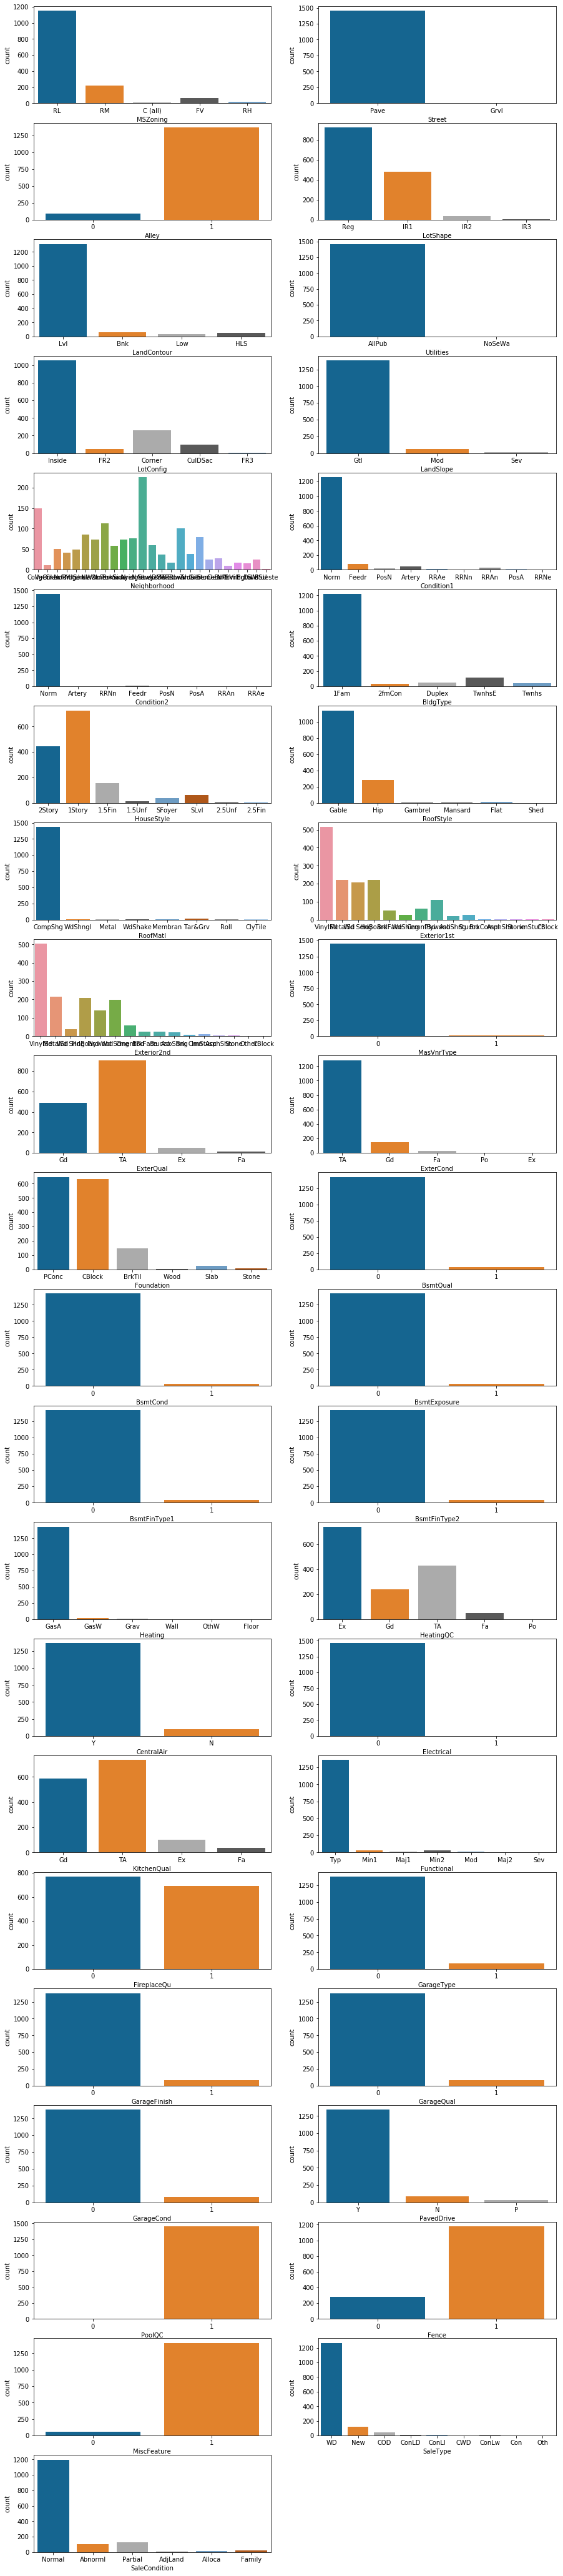

In [21]:
plt.figure(figsize=(15,75))
for index,col in enumerate(cat_vars):
    plt.subplot(22,2,index+1)
    sns.countplot(house_eda[col])
plt.show();

Street,Alley,LandContour,Utilities,Condition2,RoofMatl,Heating,GarageCond,PavedDrive,PoolQC,MiscFeature,SaleType

These variables have low variance

We will see if we can drop these variables in Feature Engineering section.

## Bi-Variate analysis with the saleprice

### Now we will see how SalePrice varies with respect to "Continous numeric variables" in the dataset

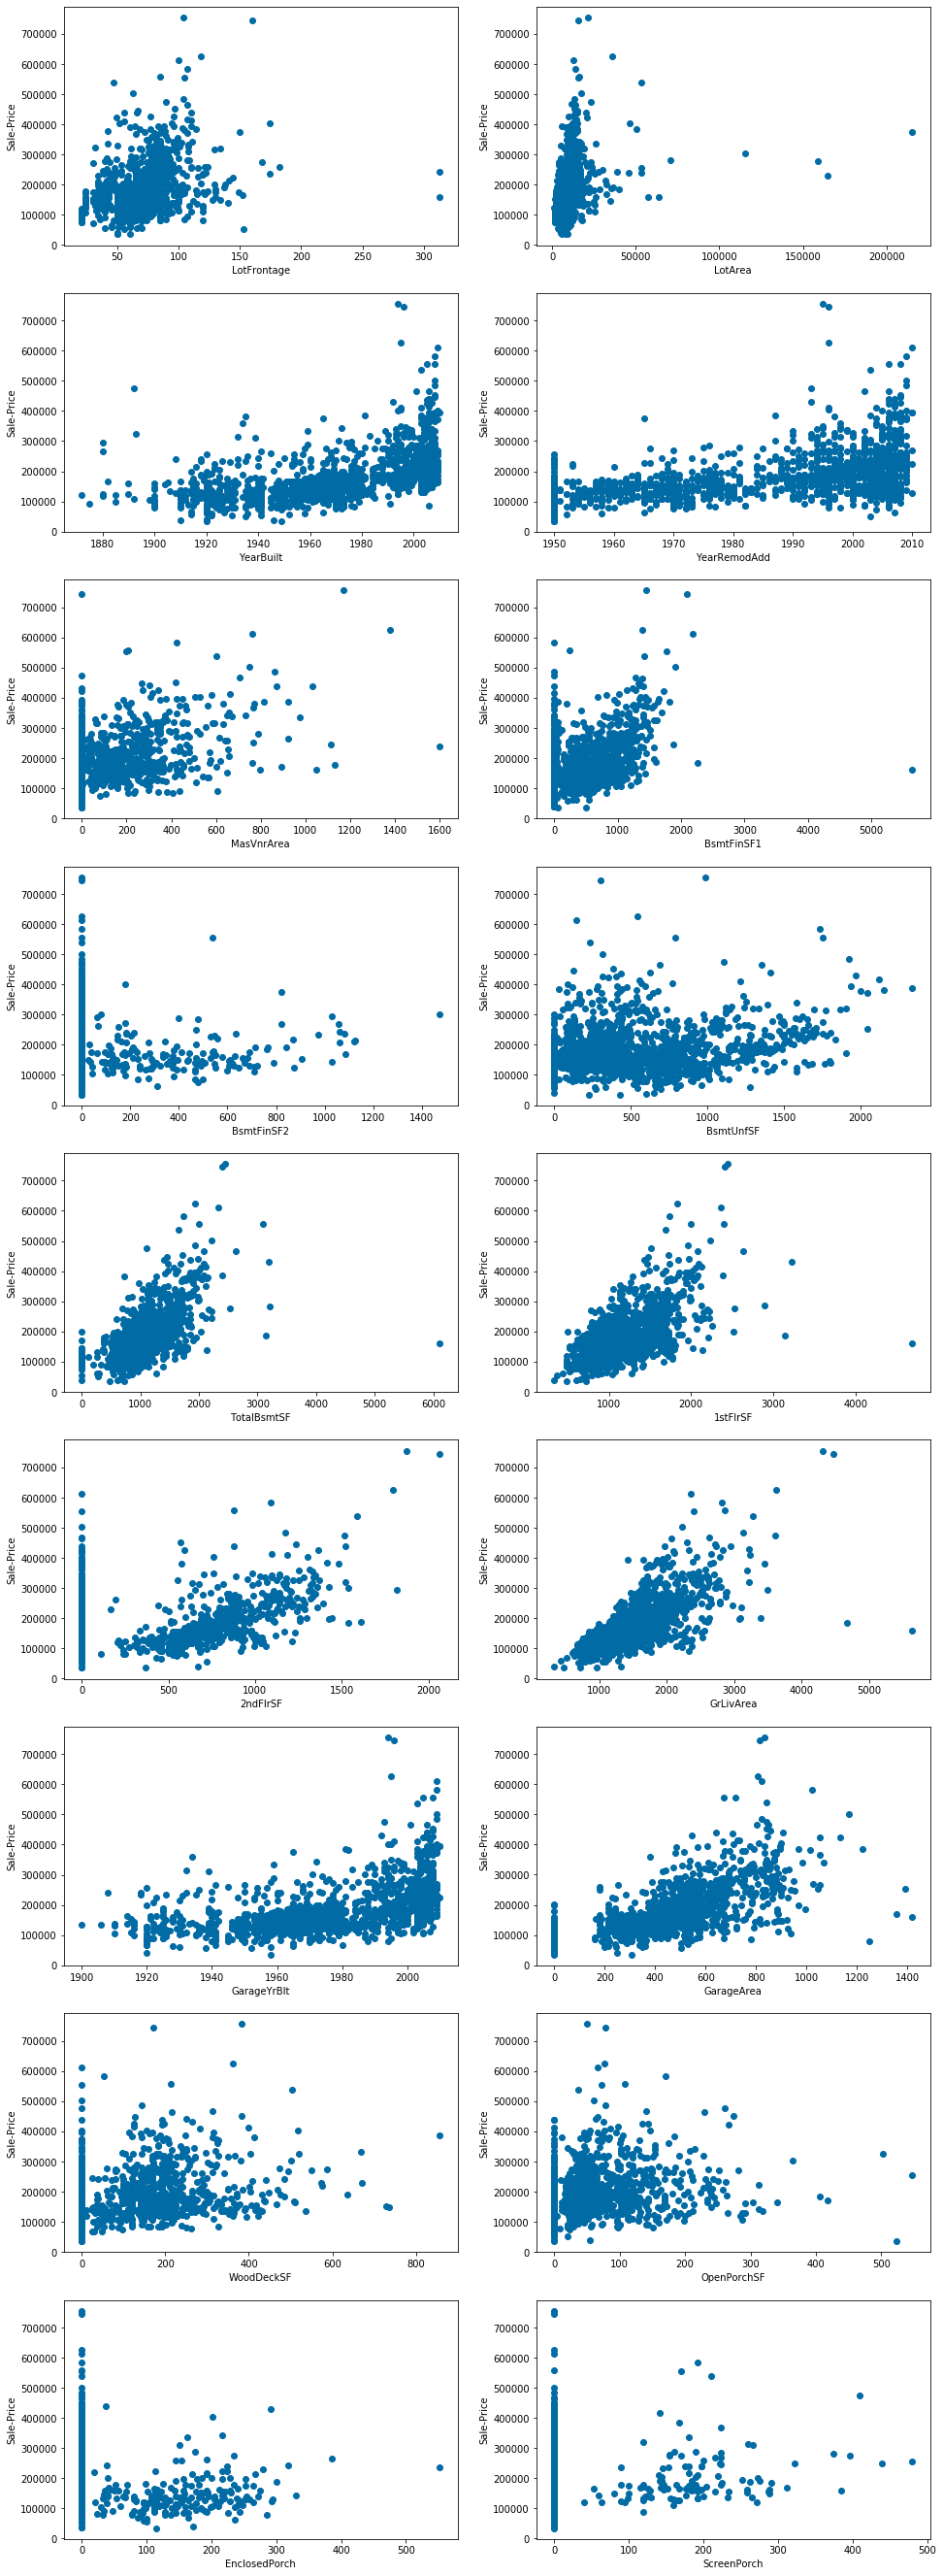

In [22]:
plt.figure(figsize=(16,48))
for index,col in enumerate(num_cont):
    plt.subplot(9,2,index+1)
    plt.scatter(x=house_data[col],y=house_data['SalePrice'])
    plt.ylabel('Sale-Price')
    plt.xlabel(col)
plt.show();

#### Analysis of these graphs one by one:

1. Lotfrontage: Most of the records seems to have values between in the range of 0-150, there are couple of dots at 300, these seems to be outliers, shows descent relation with sales price
2. LotArea: records are concentrated towards low values, there are outliers here as well, not much relation with sales price
3. MasVnrArea: shows good relation with saleprices, but there are clear outliers present for this variable
4. BsmtFinSF1: not much relation with sale price, there are outliers present here as well
5. BsmtFinSF2: not much relation with sale price, there are outliers present here as well
6. BsmtUnfSF: not much relation with sale price, there are outliers present here as well
7. TotalBsmtSF:shows good relation with saleprices, but there is an outlier for value of 6000
8. 2ndFlrSF:shows good relation with saleprices, but there are outliers present
9. GrLivArea: shows good relation with saleprices, but there are outliers present
10. GarageArea: shows good relation with saleprices, but there are outliers present
11. WoodDeckSF: shows good relation with saleprices, but there are outliers present
12. OpenPorchSF: not much relation with sale price, there are outliers present here as well
13. EnclosedPorch: not much relation with sale price, there are outliers present here as well
14. ScreenPorch: does not seem to have a lot of variation at the first place
15. All remaining variables seems to have a good relation with the target variable and there are not outliers




### Now we will see how SalePrice varies with respect to "Discrete numeric variables" in the dataset

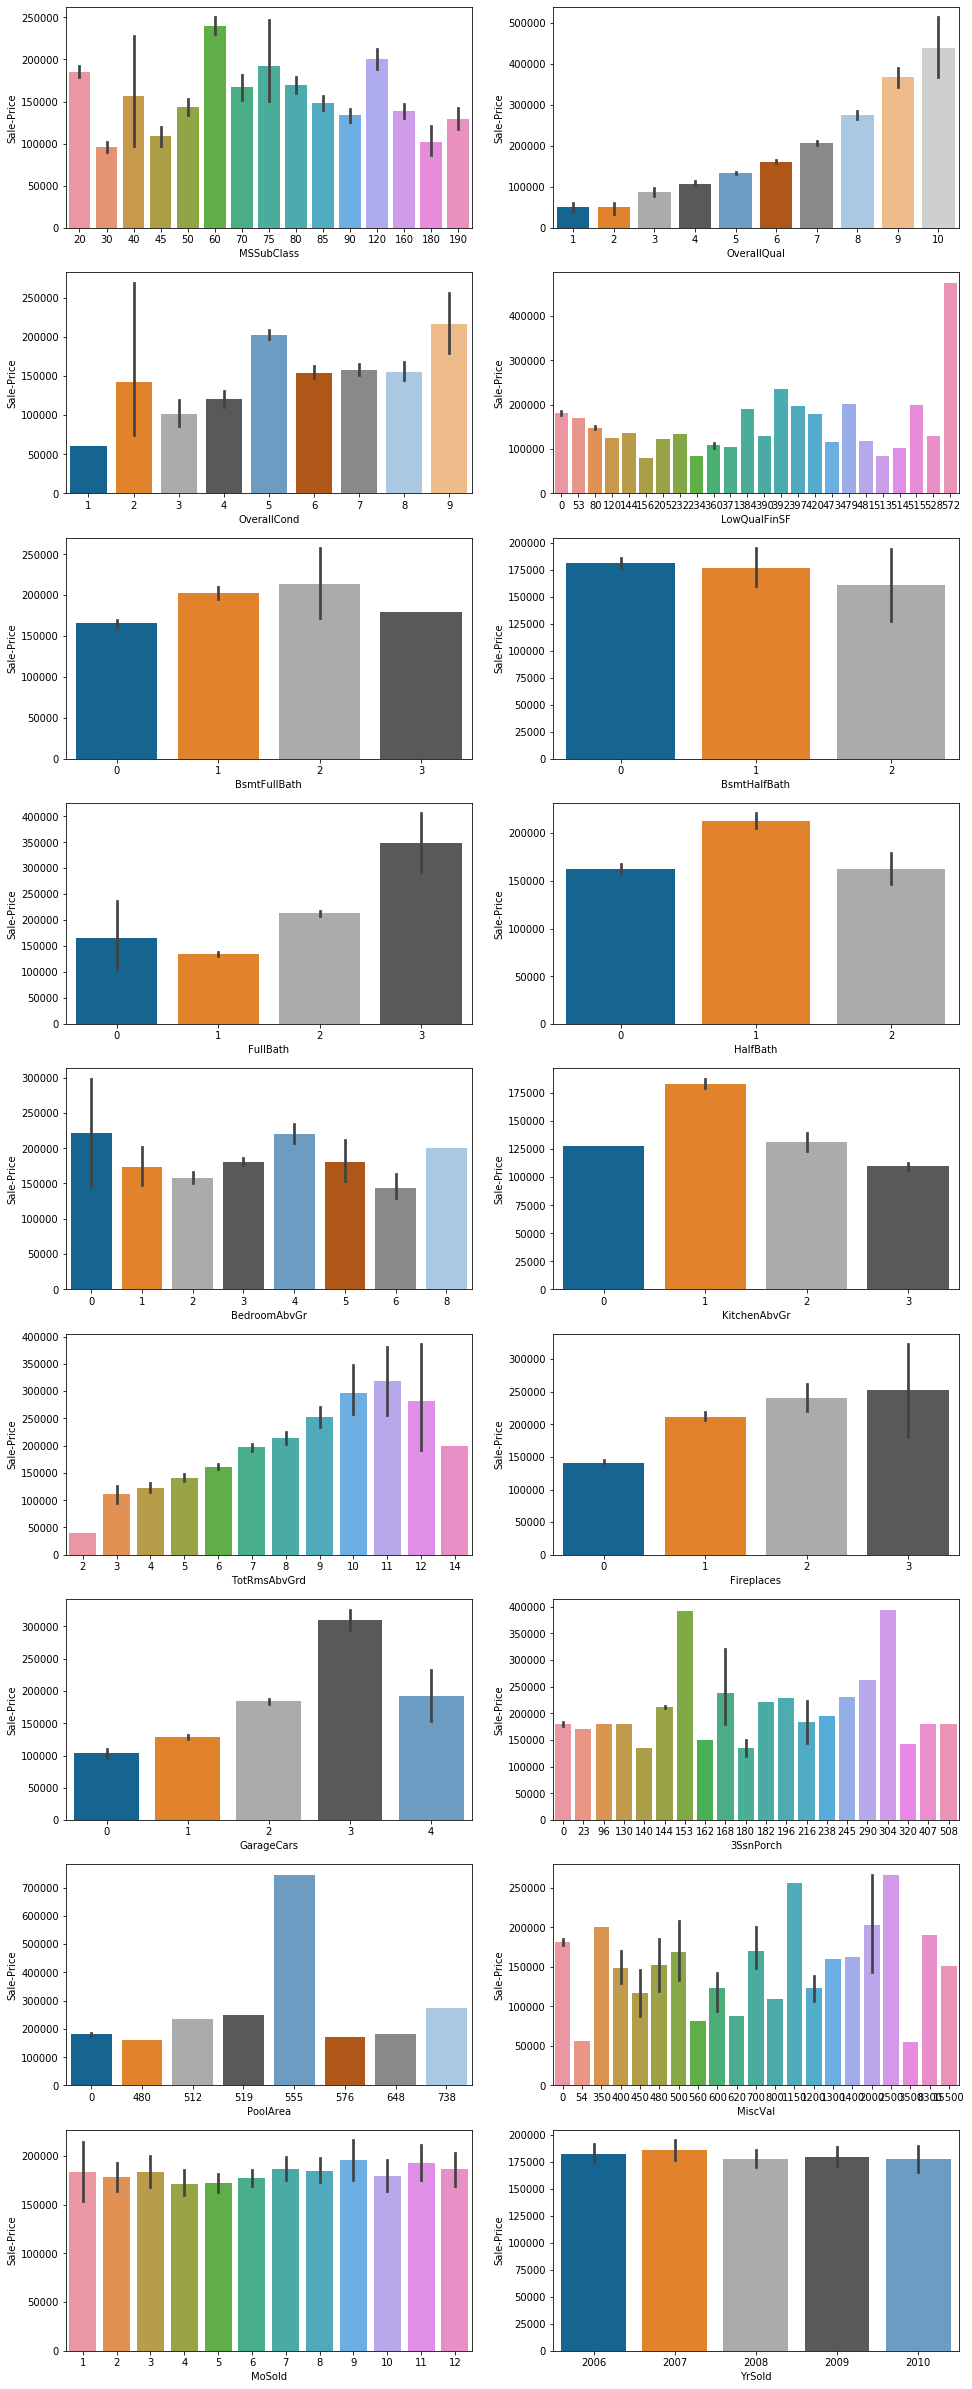

In [23]:
plt.figure(figsize=(16,48))
for index,col in enumerate(num_dis):
    plt.subplot(10,2,index+1)
    sns.barplot(x=house_data[col],y=house_data['SalePrice'])
    plt.ylabel('Sale-Price')
    plt.xlabel(col)
plt.show();

#### Analysis of these graphs

1. OverallQual: Sale Price increases as the quality of the house increases.As expected!
2. TotRmsAbvGrd: Sale Price increases as the quality of the house increases except for the last value
3. Fireplaces: Sale Price increases as the quality of the house increases except for the last value
4. Remaining variables do not seem to be related strongly with SalePrice

### lets check relation of sale price with categorical variables

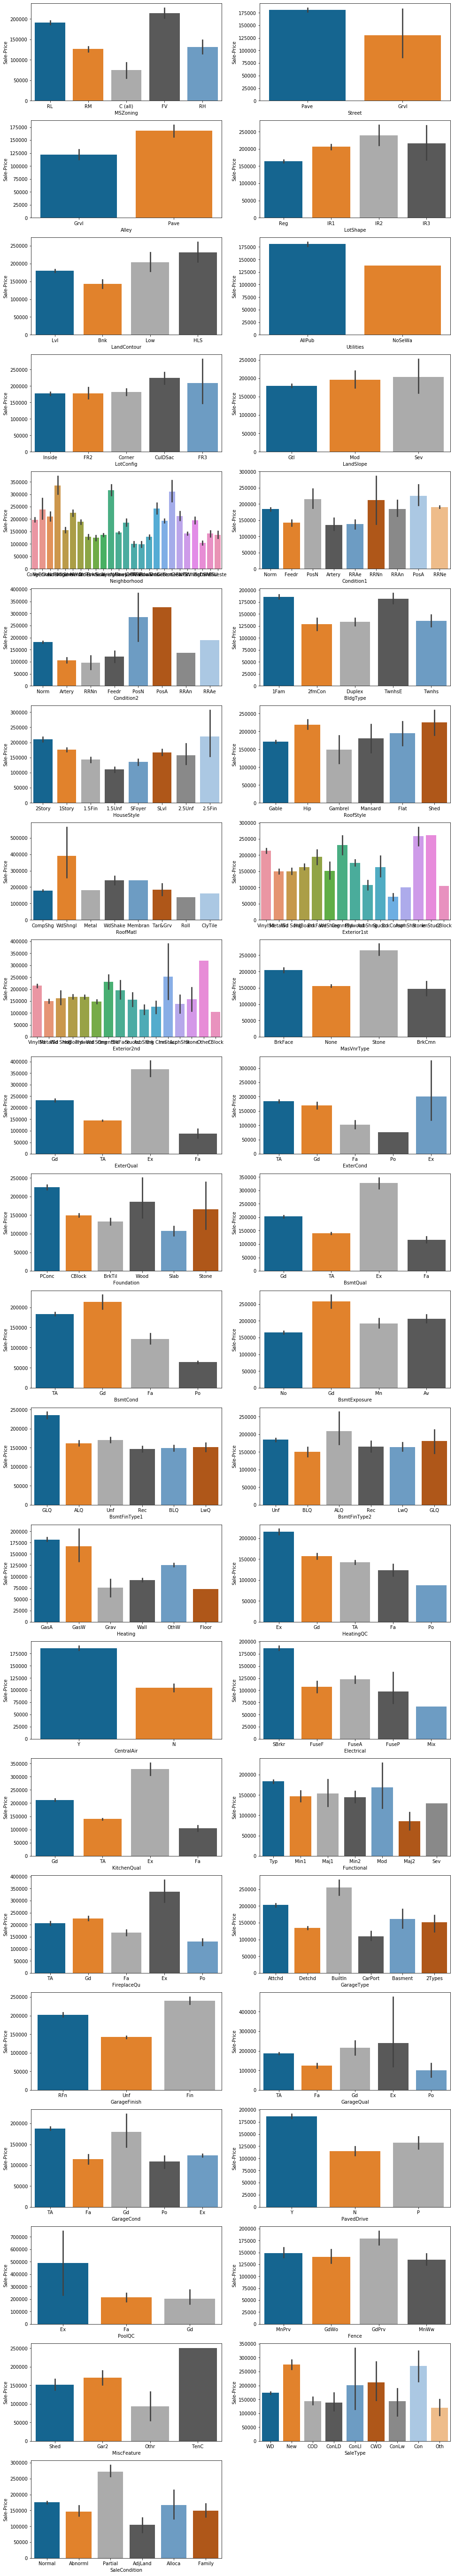

In [24]:
plt.figure(figsize=(16,100))
for index,col in enumerate(cat_vars):
    plt.subplot(22,2,index+1)
    sns.barplot(x=house_data[col],y=house_data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('Sale-Price')
plt.show();

Lots of features seems to be skewed, we will handle this in feature engineering

## <u>Outlier Detection</u>

Lets create boxplots to detect outliers

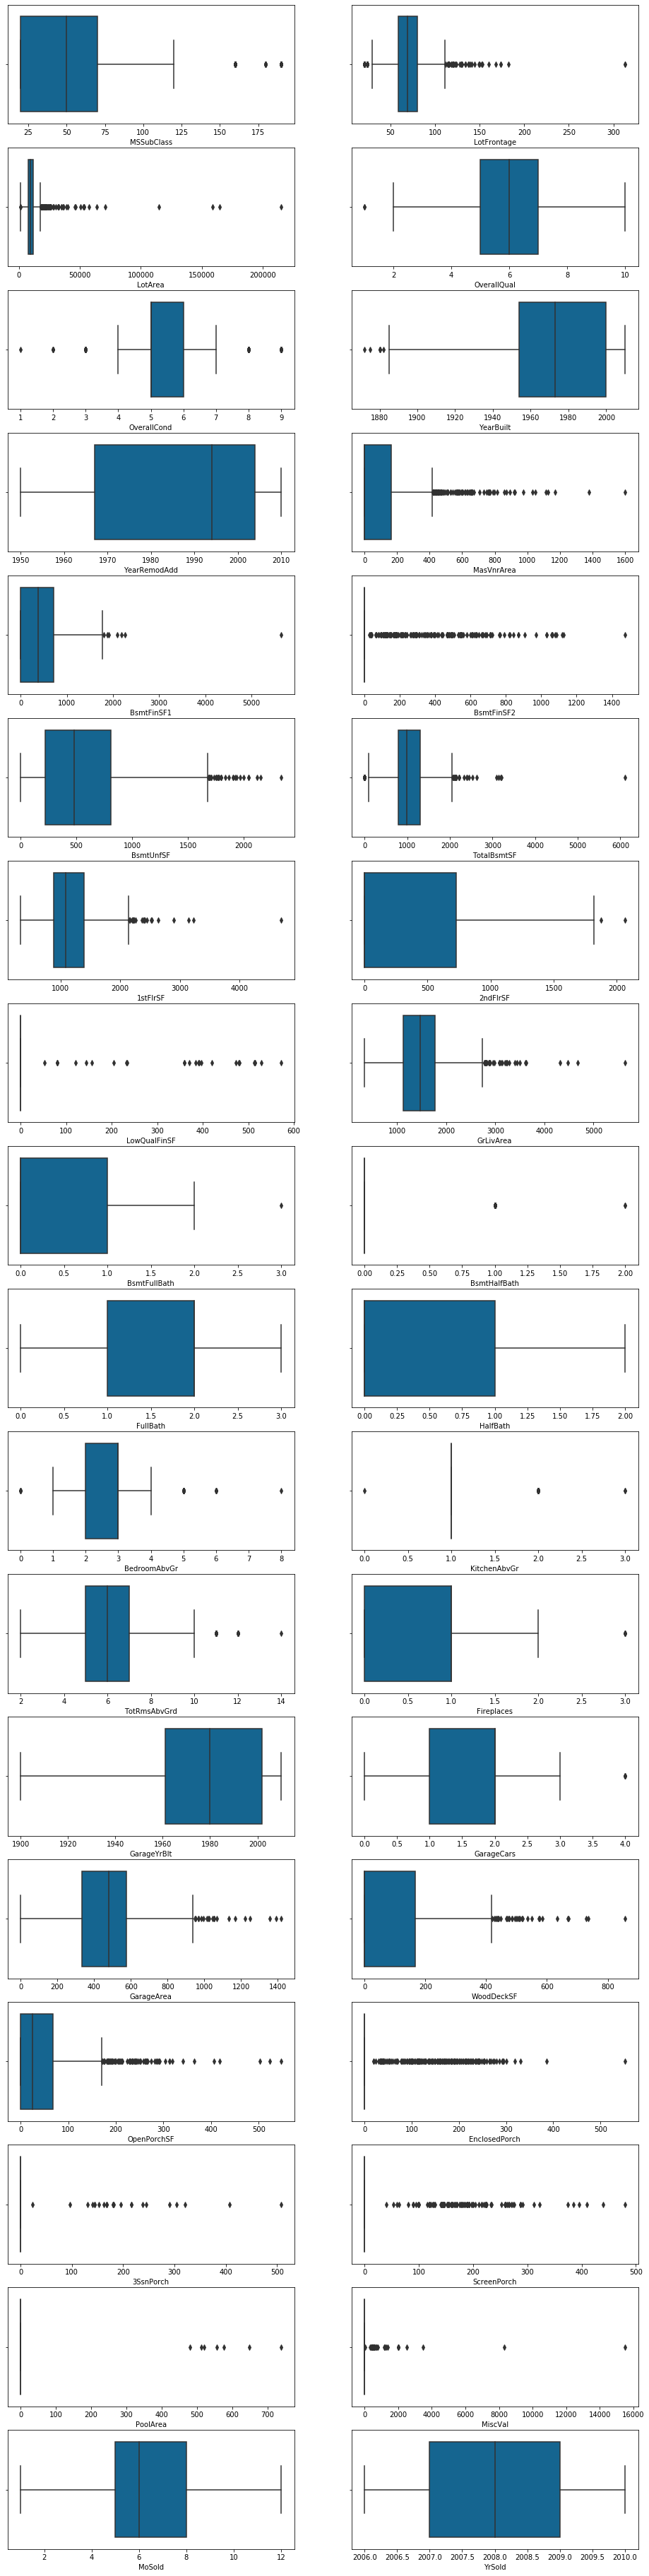

In [25]:
plt.figure(figsize=(16,70))
for index,col in enumerate(num_vars):
    plt.subplot(19,2,index+1)
    sns.boxplot(house_data[col])
    plt.xlabel(col)
plt.show();

There are so many outliers these will be treated in feature engineering

## <u>Feature engineering</u>

We had a lot of observations from data analysis part

Now let us read the test dsts set as well , so we will update all the feature engineering operations on test data as well

In [26]:
test_set = pd.read_csv(r'F:\Data Science and machine learning\Kaggle_compititions\House Prices Advanced Regression Techniques\test.csv')

In [27]:
# save "Id" in a variable and drop the column (as we have already dropped from train dataset)

test_set_id = test_set.Id
test_set.drop(columns=['Id'],inplace=True)

# save SalePrice to a variable and drop it from training dataset as test dataset does not have this column
train_sp = house_data.SalePrice
house_data.drop(columns=["SalePrice"],inplace=True)

# merge the two datasets
master=pd.concat((house_data,test_set)).reset_index(drop=True)

In [28]:
master.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### <u>Handling Missing values</u>

1. all missing values for the categorical columns will be replaced by "None"
2. all missing values for the numeric columns will be replaced by median of that field

In [29]:
for col in master.columns:
    if(master[col].dtypes=='O'):
        master[col]=master[col].replace(np.nan,'None')
    else:
        master[col]=master[col].replace(np.nan,master[col].median())

Lets check the null values

In [30]:
master.isnull().sum().sort_values(ascending = False)

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
MSSubClass       0
Length: 79, dtype: int64

See there are no null values now

## <u>Age-Variables</u>

In [31]:
# creating age of the master from year built to the sale of the master
master['HouseAge'] =  master['YrSold'] - master['YearBuilt']
# age of master after remodelling
master['RemodAddAge'] = master['YrSold'] - master['YearRemodAdd']
# creating age of the garage from year built of the garage to the sale of the master
master['GarageAge'] = master['YrSold'] - master['GarageYrBlt'] 

Lets drop original values from the master

In [32]:
master.drop(columns=["YearBuilt","YearRemodAdd","GarageYrBlt"],inplace=True)

num_cont.remove('YearBuilt')
num_cont.remove('YearRemodAdd')
num_cont.remove('GarageYrBlt')

### <u>Skewness</u>

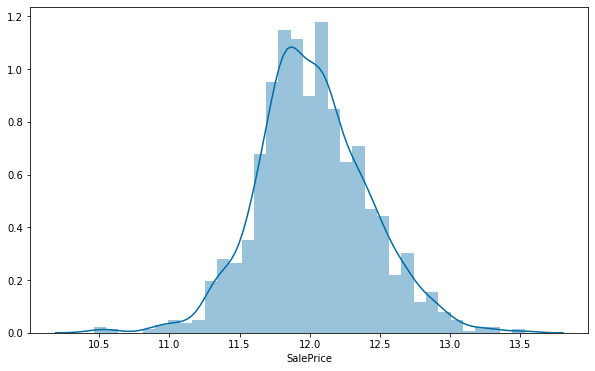

In [33]:
train_sp = np.log(train_sp)
plt.figure(figsize=(10,6))
sns.distplot(train_sp)
plt.show();

In [34]:
# taking the log of numeric variables to hanlde skewness
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for col in num_features:
    master[col] = np.log(master[col])

In [35]:
#Following variables were found to have low variance:
# MasVnArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch, 
#PoolArea,MiscVal
#lets see the frequency of each of the value

low_var = ["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","2ndFlrSF","LowQualFinSF","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch", "PoolArea","MiscVal"]

for col in low_var:
    print("\nDifferent values for ",col,"with count:",master[col].value_counts())
    
    
# from the numbers seen below, we can drop following columns
col_drop = ["BsmtFinSF1","BsmtFinSF2","LowQualFinSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

master.drop(col_drop,1,inplace=True)


Different values for  MasVnrArea with count: 0.0      1761
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

Different values for  BsmtFinSF1 with count: 0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
1022.0      1
939.0       1
1124.0      1
1619.0      1
883.0       1
Name: BsmtFinSF1, Length: 992, dtype: int64

Different values for  BsmtFinSF2 with count: 0.0      2572
294.0       5
180.0       5
162.0       3
539.0       3
         ... 
196.0       1
904.0       1
456.0       1
624.0       1
823.0       1
Name: BsmtFinSF2, Length: 272, dtype: int64

Different values for  BsmtUnfSF with count: 0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
1503.0      1
445.0       1
958.0       1
1559.0      1
1369.0      1
Name: BsmtUnfSF, Length: 1135, dtype: int64

Different values for  2n

In [36]:
# lets check variation in categorical variables identied in data analysis section
low_var1 = ["Street","Alley","LandContour","Utilities","Condition2","RoofMatl","Heating","GarageCond","PavedDrive","PoolQC","MiscFeature","SaleType"]
for col in low_var1:
    print("\nDifferent values for ",col,"with count:",master[col].value_counts())

# from the numbers seen below, we can drop following columns
col_drop1 = ["Street","Alley","Utilities","Condition2","RoofMatl","Heating","GarageCond","PavedDrive","PoolQC","MiscFeature"]
            
master.drop(col_drop1,1,inplace=True)


Different values for  Street with count: Pave    2907
Grvl      12
Name: Street, dtype: int64

Different values for  Alley with count: None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

Different values for  LandContour with count: Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

Different values for  Utilities with count: AllPub    2916
None         2
NoSeWa       1
Name: Utilities, dtype: int64

Different values for  Condition2 with count: Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

Different values for  RoofMatl with count: CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64

Different values for  Heating with count: GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [37]:
master.shape

(2919, 61)

In [38]:
# In order to perform linear regression, we need to convert categorical variables to numeric variables.

# We have ordinal variables present in the dataest, lets treat them first:
master['ExterQual'] = master['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
master['ExterCond'] = master['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
master['BsmtQual'] = master['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master['BsmtCond'] = master['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master['BsmtExposure'] = master['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
master['BsmtFinType1'] = master['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
master['BsmtFinType2'] = master['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
master['HeatingQC'] = master['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
master['CentralAir'] = master['CentralAir'].map({'N':0,'Y':1})
master['KitchenQual'] = master['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master['GarageQual'] = master['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master['GarageFinish'] = master['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

In [40]:
master.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SaleCondition,HouseAge,RemodAddAge,GarageAge
0,60,RL,4.174387,9.041922,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,61,None,2,2008,WD,Normal,5,5,5.0
1,20,RL,4.382027,9.169518,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,298,0,None,5,2007,WD,Normal,31,31,31.0
2,60,RL,4.219508,9.328123,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,42,None,9,2008,WD,Normal,7,6,7.0
3,70,RL,4.094345,9.164296,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,35,None,2,2006,WD,Abnorml,91,36,8.0
4,60,RL,4.430817,9.565214,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,192,84,None,12,2008,WD,Normal,8,8,8.0
5,50,RL,4.442651,9.554993,IR1,Lvl,Inside,Gtl,Mitchel,Norm,...,40,30,MnPrv,10,2009,WD,Normal,16,14,16.0
6,20,RL,4.317488,9.218705,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,255,57,None,8,2007,WD,Normal,3,2,3.0
7,60,RL,4.219508,9.247829,IR1,Lvl,Corner,Gtl,NWAmes,PosN,...,235,204,None,11,2009,WD,Normal,36,36,36.0
8,50,RM,3.931826,8.719317,Reg,Lvl,Inside,Gtl,OldTown,Artery,...,90,0,None,4,2008,WD,Abnorml,77,58,77.0
9,190,RL,3.912023,8.911934,Reg,Lvl,Corner,Gtl,BrkSide,Artery,...,0,4,None,1,2008,WD,Normal,69,58,69.0


In [41]:
# now lets create dummy variables for the remaining cateogorical variables
categorical_variables=[]

for col in master.columns:
    if(master[col].dtypes=='O'):
        categorical_variables.append(col)
#converting into dummies
master_dummies = pd.get_dummies(master[categorical_variables],drop_first=True)

#drop categorical variables
master.drop(categorical_variables,1,inplace=True)

#Concatenate dummy_variables with master
master = pd.concat([master,master_dummies],axis=1)

#checking the shape of master
master.shape

(2919, 185)

#### Now we have performed all the necessary operations on train and test data sets so we are separating them again

In [42]:
train_set = master[:1460]
test_set = master[1460:]

In [43]:
train_set['SalePrice'] = train_sp
#lets check the variables

numerical_variables=[]

for col in train_set.columns:
    if(train_set[col].dtypes!='O'):
        numerical_variables.append(col)
        
for col in numerical_variables:
    print(train_set[col].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]))
    print('\n')

#Lets handle the outliers

q3 = train_set['LotFrontage'].quantile(0.99)
train_set= train_set[train_set.LotFrontage<=q3]

q3 = train_set['MasVnrArea'].quantile(0.99)
train_set= train_set[train_set.MasVnrArea<=q3]

q3 = train_set['BsmtUnfSF'].quantile(0.99)
train_set= train_set[train_set.BsmtUnfSF<=q3]

q3 = train_set['TotalBsmtSF'].quantile(0.99)
train_set= train_set[train_set.TotalBsmtSF<=q3]

q3 = train_set['2ndFlrSF'].quantile(0.99)
train_set= train_set[train_set['2ndFlrSF']<=q3]


    

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
5%         20.000000
10%        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


count    1460.000000
mean        4.196097
std         0.320158
min         3.044522
5%          3.582110
10%         3.891820
25%         4.094345
50%         4.219508
75%         4.369448
90%         4.521789
95%         4.644391
99%         4.922963
max         5.746203
Name: LotFrontage, dtype: float64


count    1460.000000
mean        9.110838
std         0.517448
min         7.170120
5%          8.105201
10%         8.517193
25%         8.929766
50%         9.156781
75%         9.358890
90%         9.573711
95%         9.764292
99%        10.533322
max        12.279532
Name: LotArea, dtype: float64


count    1460.000000
mean        6.099315
std         1.382997
min         1.0

Name: GarageAge, dtype: float64


count    1460.000000
mean        0.044521
std         0.206319
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: MSZoning_FV, dtype: float64


count    1460.0
mean        0.0
std         0.0
min         0.0
5%          0.0
10%         0.0
25%         0.0
50%         0.0
75%         0.0
90%         0.0
95%         0.0
99%         0.0
max         0.0
Name: MSZoning_None, dtype: float64


count    1460.000000
mean        0.010959
std         0.104145
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: MSZoning_RH, dtype: float64


count    1460.000000
mean        0.788356
std         0.408614
min         0.000000
5%          0.0000

count    1460.000000
mean        0.154110
std         0.361177
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: Neighborhood_NAmes, dtype: float64


count    1460.000000
mean        0.006164
std         0.078298
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: Neighborhood_NPkVill, dtype: float64


count    1460.00000
mean        0.05000
std         0.21802
min         0.00000
5%          0.00000
10%         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
90%         0.00000
95%         0.05000
99%         1.00000
max         1.00000
Name: Neighborhood_NWAmes, dtype: float64


count    1460.000000
mean        0.028082
std         0.165264

Name: HouseStyle_2.5Unf, dtype: float64


count    1460.000000
mean        0.304795
std         0.460478
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: HouseStyle_2Story, dtype: float64


count    1460.000000
mean        0.025342
std         0.157217
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: HouseStyle_SFoyer, dtype: float64


count    1460.000000
mean        0.044521
std         0.206319
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: HouseStyle_SLvl, dtype: float64


count    1460.0

Name: Exterior2nd_Wd Shng, dtype: float64


count    1460.000000
mean        0.304795
std         0.460478
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: MasVnrType_BrkFace, dtype: float64


count    1460.000000
mean        0.597260
std         0.490617
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: MasVnrType_None, dtype: float64


count    1460.000000
mean        0.087671
std         0.282913
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: MasVnrType_Stone, dtype: float64


count    1460

count    1460.000000
mean        0.036986
std         0.188793
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: Fence_GdWo, dtype: float64


count    1460.000000
mean        0.107534
std         0.309897
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: Fence_MnPrv, dtype: float64


count    1460.000000
mean        0.007534
std         0.086502
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: Fence_MnWw, dtype: float64


count    1460.000000
mean        0.807534
std         0.394372
min         

### <u> Data Scaling using MinMaxScalar</u>

In [45]:
scaler=MinMaxScaler()

y = train_set.SalePrice.reset_index(drop=True)
train_set.drop('SalePrice',1,inplace=True)

scaler.fit(train_set)
X = scaler.transform(train_set)

# transform the train and test set, and add on the Id and SalePrice variables
X = pd.DataFrame(X,columns = train_set.columns).reset_index(drop=True)
X.head()

scaler.fit(test_set)
test_set = scaler.transform(test_set)
test_set = pd.DataFrame(test_set,columns=train_set.columns).reset_index(drop=True)

MinMaxScaler(copy=True, feature_range=(0, 1))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.602447,0.386615,0.666667,0.500,0.255208,0.666667,0.5,0.8,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.713161,0.412969,0.555556,0.875,0.000000,0.333333,0.5,0.8,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.626506,0.445729,0.666667,0.500,0.210938,0.666667,0.5,0.8,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.559768,0.411891,0.666667,0.500,0.000000,0.333333,0.5,0.6,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.739176,0.494699,0.777778,0.500,0.455729,0.666667,0.5,0.8,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


MinMaxScaler(copy=True, feature_range=(0, 1))

### <u> PCA (Dimensionality reduction)</u>

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(svd_solver='randomized',random_state=42)

In [48]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [50]:
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[ 1.38460235e-03,  2.76571119e-02,  1.43424813e-02, ...,
        -4.64053831e-03, -5.91680733e-02,  9.32444878e-02],
       [-8.86514835e-02,  5.70954618e-02,  4.01559895e-02, ...,
         1.58351847e-03,  5.07804031e-02, -4.57794300e-02],
       [ 1.20432111e-01, -6.23975069e-03,  7.44355577e-03, ...,
        -2.68435979e-04,  1.30092684e-01, -1.02234156e-01],
       ...,
       [-0.00000000e+00, -3.70117154e-17,  2.53374963e-16, ...,
        -1.63871351e-16, -3.56025757e-17,  2.17368517e-17],
       [ 0.00000000e+00,  2.13451776e-17, -4.30780912e-17, ...,
        -3.87518386e-17,  4.65280387e-18,  1.41584880e-16],
       [-0.00000000e+00,  6.63695413e-18,  1.27820057e-17, ...,
         1.43240809e-17,  1.05753448e-17,  7.78160125e-17]])

In [51]:
#Lets check the variance ratios
pca.explained_variance_ratio_

array([1.35546873e-01, 7.90708175e-02, 5.94788544e-02, 4.21466149e-02,
       4.08811300e-02, 3.16236462e-02, 2.87677148e-02, 2.85440433e-02,
       2.72534871e-02, 2.44203493e-02, 2.29342295e-02, 2.22381816e-02,
       2.14082038e-02, 2.01855035e-02, 1.90290489e-02, 1.66103199e-02,
       1.60010274e-02, 1.45743508e-02, 1.41838885e-02, 1.30749038e-02,
       1.22072334e-02, 1.14778185e-02, 1.04430536e-02, 1.02139985e-02,
       9.64254746e-03, 9.48940722e-03, 9.09012153e-03, 8.56458841e-03,
       8.11844864e-03, 7.59794725e-03, 7.13228231e-03, 6.96942181e-03,
       6.28458331e-03, 6.20991702e-03, 5.93313517e-03, 5.83146663e-03,
       5.72435300e-03, 5.57912837e-03, 5.18666798e-03, 5.10791593e-03,
       4.93238351e-03, 4.76280679e-03, 4.70996994e-03, 4.36705533e-03,
       4.23863835e-03, 4.16572504e-03, 3.98888969e-03, 3.90404253e-03,
       3.77552276e-03, 3.66224424e-03, 3.55535925e-03, 3.46302146e-03,
       3.39394717e-03, 3.26383928e-03, 3.16887621e-03, 3.04603096e-03,
      

#### Plotting the scree plot

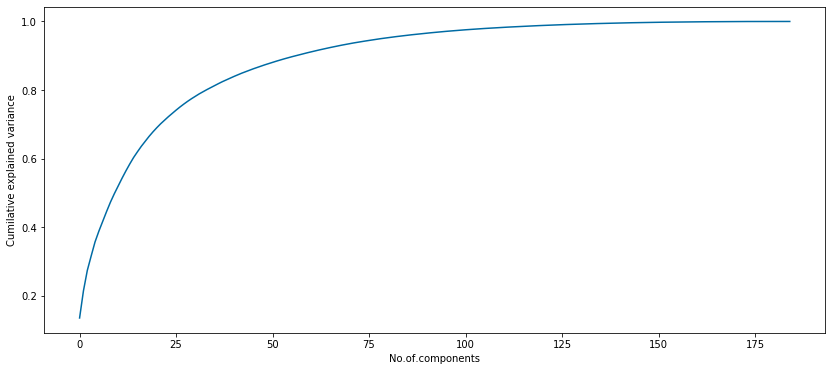

In [52]:
#Making the screeplot - plotting the cumulative variance against the number of components
plt.figure(figsize=(14,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of.components')
plt.ylabel('Cumilative explained variance')
plt.show();

<b>From Scree plot we can conclude that 115 PCs can explain more than 90% variation of the dataset</b>

In [53]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=115)

In [54]:
df_pca = pd.DataFrame(pca_final.fit_transform(X))
df_pca.shape

(1386, 115)

In [55]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,1.492622,-0.556563,-0.286735,-1.269805,-0.300628,-0.547112,0.130209,0.324901,0.384989,-0.039256,...,-0.016747,-0.019772,-0.005227,-0.002856,-0.022828,-0.010466,0.021150,-0.025411,0.047191,-0.001490
1,-0.466123,0.836386,-0.011360,0.262404,0.447256,0.989061,-0.133149,0.941241,0.195086,0.146475,...,0.027134,-0.001751,0.220102,0.018395,-0.182581,0.008786,-0.062107,-0.134562,0.041069,0.038651
2,1.902901,-0.085137,-0.902082,-0.634991,0.149219,-0.378665,0.077332,0.596356,0.192605,0.328981,...,-0.063629,-0.067534,-0.003791,0.061774,-0.027895,-0.050484,0.009023,-0.015959,0.007435,0.003274
3,-0.316100,-0.613666,-0.858277,1.203334,0.481841,0.084003,-0.587759,-0.526930,-0.272433,0.595842,...,0.050473,-0.011137,0.043639,0.011575,-0.007855,-0.008962,0.094179,-0.055618,0.002561,0.084219
4,2.003864,0.062231,-1.189197,-0.450415,0.226904,-0.365887,-0.411312,0.412565,-0.139746,0.610877,...,-0.005884,-0.071524,-0.038124,0.012734,0.073060,-0.059636,0.055041,-0.013131,-0.022267,0.030768


## <u>Linear regression model</u>

In [56]:
import statsmodels.api as sm

In [57]:
#add a constant to get an intercept

X_train_sm = sm.add_constant(df_pca)

#train the model
lr = sm.OLS(y,X_train_sm).fit()

In [58]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     139.3
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:52:07   Log-Likelihood:                 1205.0
No. Observations:                1386   AIC:                            -2178.
Df Residuals:                    1270   BIC:                            -1571.
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9949      0.003   4214.242      0.0

In [59]:
#Prediction on training data
y_train_pred = lr.predict(X_train_sm)

In [60]:
from sklearn.metrics import mean_squared_error,r2_score

In [61]:
r_squared = r2_score(y_train_pred,y)
r_squared

0.9207415949314007

<b> We have got 92% accuracy on the training dataset</b>

Lets make predictions on test dataset

In [62]:
test_pca =pd.DataFrame(pca_final.fit_transform(test_set))

test_pca_sm = sm.add_constant(test_pca)
y_test_pred = lr.predict(test_pca_sm)

In [63]:
y_test_pred

0       11.374722
1       12.033790
2       12.312662
3       12.519273
4       11.988564
          ...    
1454    11.427387
1455    11.567108
1456    12.068053
1457    11.661933
1458    12.485687
Length: 1459, dtype: float64

## <u>Random Forest Model</u>

In [66]:
# Training model

regr = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1)

start = time.time()
regr.fit(df_pca,y)
end = time.time()

print('Total_time_taken : ',end-start)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Total_time_taken :  293.25156450271606


In [67]:
# lets make prediction on test dataset
y_test_pred = regr.predict(test_pca)

In [68]:
y_test_pred

array([11.73794581, 11.89933851, 12.22496482, ..., 12.03047241,
       11.66624273, 12.26157293])

In [70]:
sub = pd.DataFrame()
sub['Id']= test_set_id
sub['SalePrice']=np.exp(y_test_pred)
sub.to_csv(r'F:\Data Science and machine learning\Kaggle_compititions\House Prices Advanced Regression Techniques\submission.csv',index=False)